The goal of this workbook is to identify potential relationships between response rates on each PCIAT question and other variables

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Load the data file "train.csv"
train = pd.read_csv('train.csv')

In [41]:
train.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [45]:
# Create 20 new variables that indicate whether or not PCIAT-PCIAT_01 through PCIAT-PCIAT_20 were NaN
pciats = [col for col in train.columns if 'PCIAT' in col]
for pciat in pciats:
    train[pciat + '_isnotna'] = train[pciat].notna().astype(int)

In [37]:
train.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_12_isnotna,PCIAT-PCIAT_13_isnotna,PCIAT-PCIAT_14_isnotna,PCIAT-PCIAT_15_isnotna,PCIAT-PCIAT_16_isnotna,PCIAT-PCIAT_17_isnotna,PCIAT-PCIAT_18_isnotna,PCIAT-PCIAT_19_isnotna,PCIAT-PCIAT_20_isnotna,PCIAT-PCIAT_Total_isnotna
0,95488452,Spring,8,1,Summer,65.0,Spring,16.119083,52.0,62.0,...,1,1,1,1,1,1,1,1,1,1
1,8e0b739c,Summer,10,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,0e64e5ef,Summer,9,1,NaN,NaN,Summer,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,d1aafc4e,Winter,12,0,NaN,NaN,Summer,NaN,NaN,0.0,...,1,1,1,1,1,1,1,1,1,1
4,97ac1b72,Summer,6,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Create a list of variables that start with PCIAT_ and end with isnotna
pciats_isnotna = [col for col in train.columns if 'PCIAT' in col and 'isnotna' in col]

# Remove PCIAT_Total_isnotna from pciats_isnotna
pciats_isnotna.remove('PCIAT-PCIAT_Total_isnotna')
pciats_isnotna.remove('PCIAT-Season_isnotna')

In [47]:
pciats_isnotna

['PCIAT-PCIAT_01_isnotna',
 'PCIAT-PCIAT_02_isnotna',
 'PCIAT-PCIAT_03_isnotna',
 'PCIAT-PCIAT_04_isnotna',
 'PCIAT-PCIAT_05_isnotna',
 'PCIAT-PCIAT_06_isnotna',
 'PCIAT-PCIAT_07_isnotna',
 'PCIAT-PCIAT_08_isnotna',
 'PCIAT-PCIAT_09_isnotna',
 'PCIAT-PCIAT_10_isnotna',
 'PCIAT-PCIAT_11_isnotna',
 'PCIAT-PCIAT_12_isnotna',
 'PCIAT-PCIAT_13_isnotna',
 'PCIAT-PCIAT_14_isnotna',
 'PCIAT-PCIAT_15_isnotna',
 'PCIAT-PCIAT_16_isnotna',
 'PCIAT-PCIAT_17_isnotna',
 'PCIAT-PCIAT_18_isnotna',
 'PCIAT-PCIAT_19_isnotna',
 'PCIAT-PCIAT_20_isnotna']

In [48]:
# Create a new variable PCIAT_isnotna_total by adding the values of the columns in pciats_isnotna
train['PCIAT_isnotna_total'] = train[pciats_isnotna].sum(axis=1)

In [49]:
# Create a table of PCIAT_isnotna_toal
train['PCIAT_isnotna_total'].value_counts()

PCIAT_isnotna_total
20    2141
0      974
19      42
18       8
10       1
15       1
17       1
Name: count, dtype: int64

<Axes: xlabel='Basic_Demos-Age', ylabel='PCIAT-PCIAT_12_isnotna'>

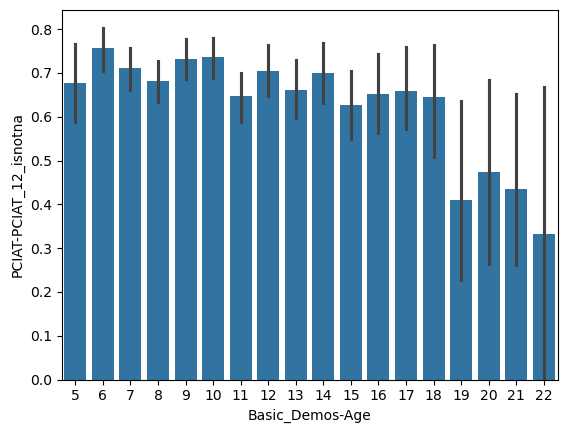

In [6]:
# Create a percentage barplot where the x variable is 'Basic_Demos-Age' and the y variable is 'PCIAT-PCIAT_12_isnotna'
sns.barplot(x='Basic_Demos-Age', y='PCIAT-PCIAT_12_isnotna', data=train)


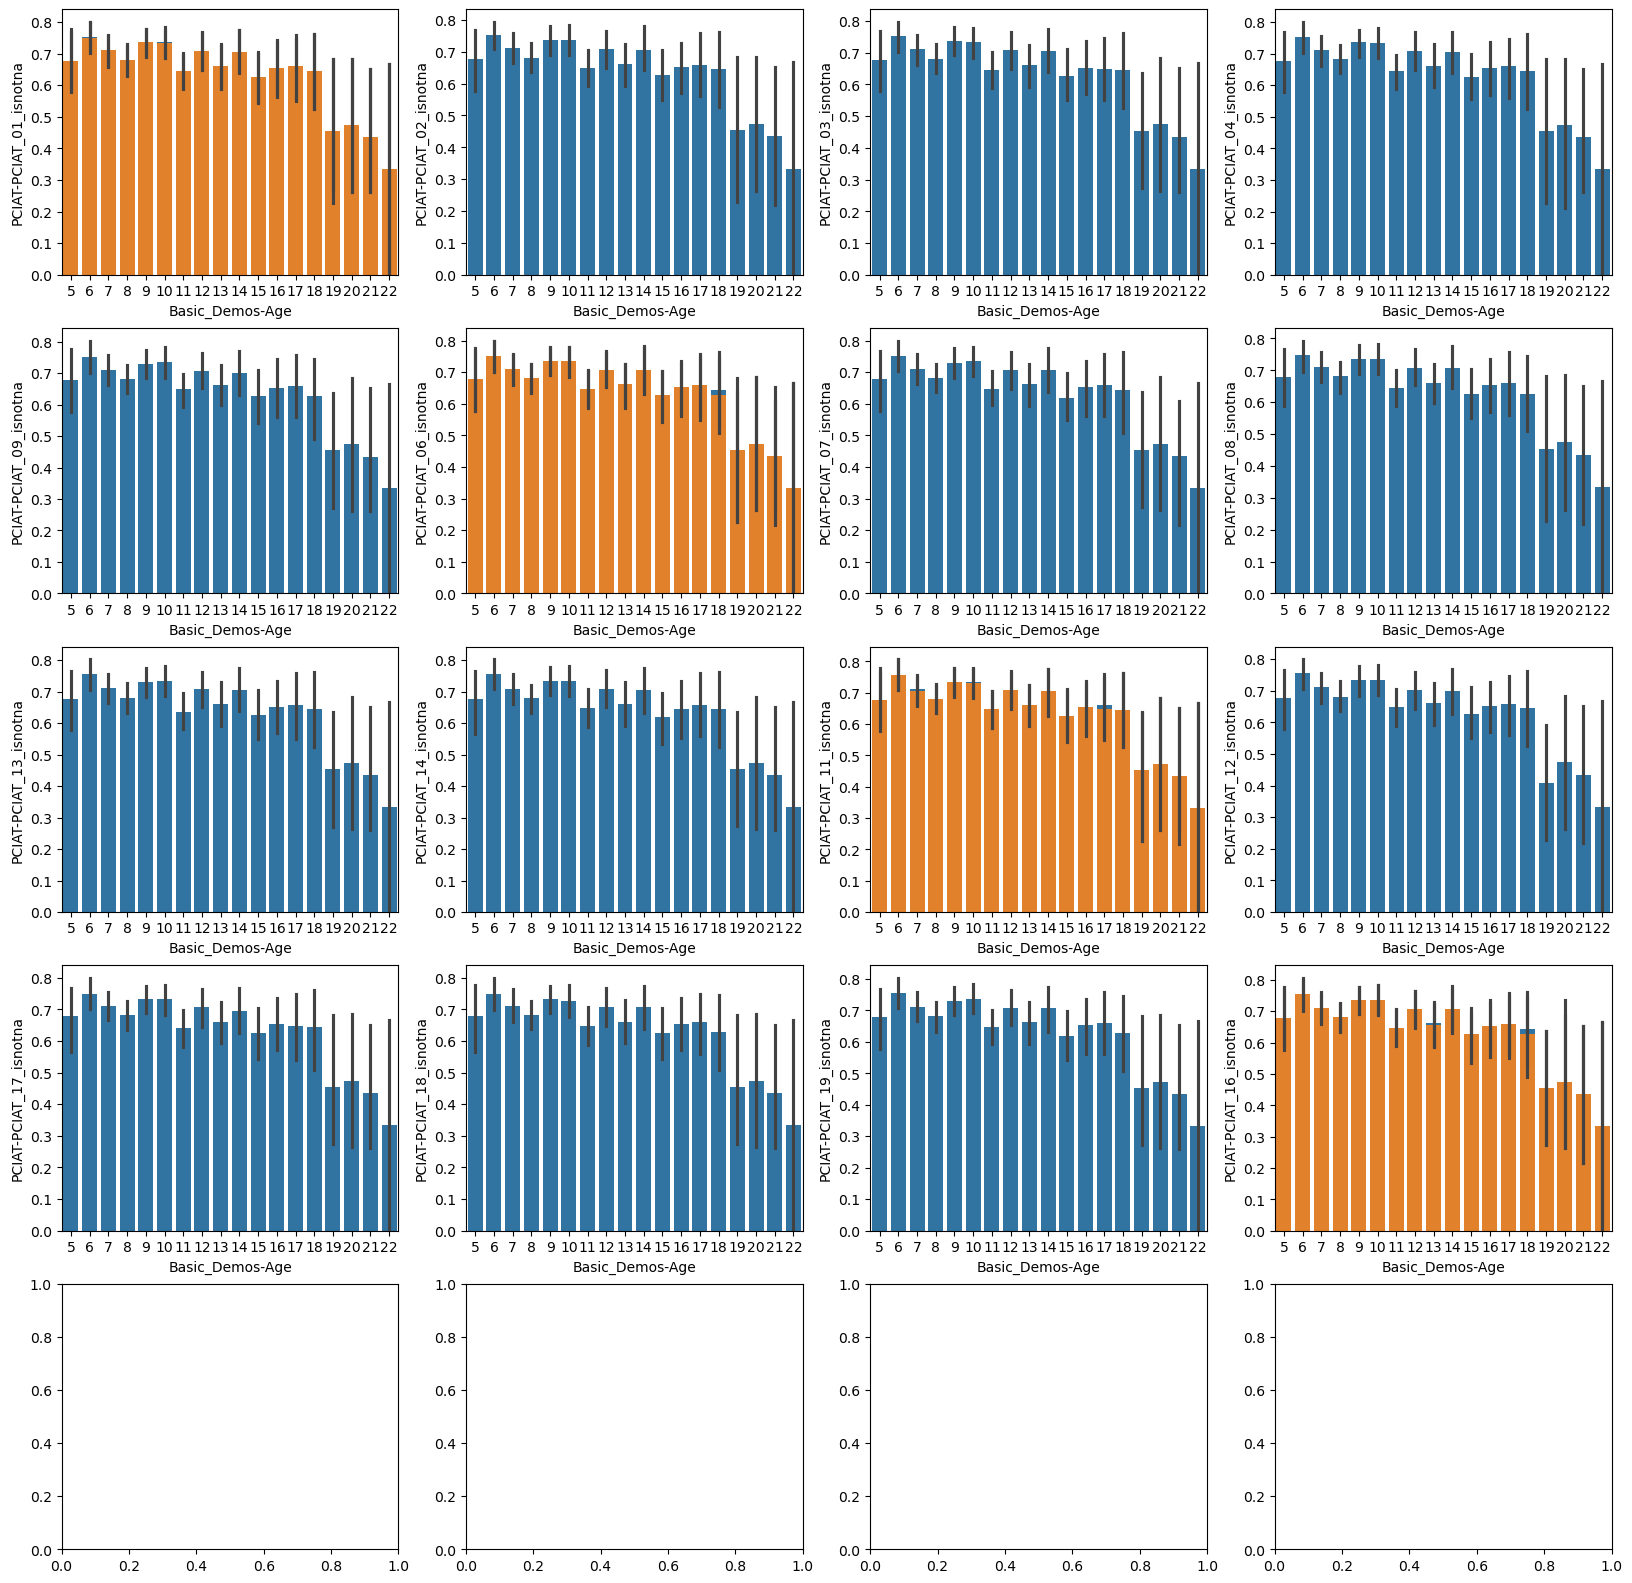

In [7]:
pciatsnotna = [col for col in train.columns if 'isnotna' in col]

# Remove PCIAT-Season_isnotna and PCIAT-PCIAT_Total_isnotna from pciatsnotna
pciatsnotna.remove('PCIAT-Season_isnotna')
pciatsnotna.remove('PCIAT-PCIAT_Total_isnotna')

figure, axis = plt.subplots(5, 4, figsize=(20,20))
# For each column in pciatsnotna, create a bar graph and add it to the axis
for i, col in enumerate(pciatsnotna):
    sns.barplot(x='Basic_Demos-Age', y=col, data=train, ax=axis[i//5, i%4])


<Axes: xlabel='Basic_Demos-Age', ylabel='pciatsnotna_sum'>

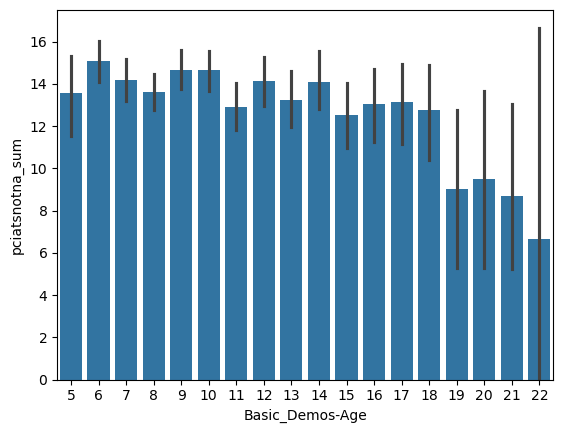

In [8]:
# Make a new variable that is the sum of all the variables in pciatsnotna
train['pciatsnotna_sum'] = train[pciatsnotna].sum(axis=1)

# Make a bar graph with Basic_Demos-Age on the x axis and pciatsnotna_sum on the y axis. Convert the y values to percentages within each value of Basic_Demos-Age
sns.barplot(x='Basic_Demos-Age', y='pciatsnotna_sum', data=train, estimator=np.mean)